In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

# Считаем данные

In [2]:
data_file = open('./data.pkl', 'rb')
dictionary = pickle.load(data_file)
source_data = pd.DataFrame.from_dict(dictionary)
source_data.head(6)

,fpwnv,lwoug,sikro
0,12.039231,17.566993,21.099365
1,5.344218,12.202338,11.341678
2,18.340471,25.999912,16.067002
3,17.200144,15.501496,14.831483
4,23.387674,2.968278,15.738374
5,13.819148,17.807346,19.060127


# Задания

- Найти среднее и дисперсию каждого столбца.
- Визуализировать датасет любым удобным способом. Можно несколькими графиками.
- Построить графики для каждой пары признаков в наборе данных.
- Построить гистограмму каждого из признаков.
- Найти выбросы. Так как вариант нечётный (31), то присвоить выбросам среднее значение.
- Найти новые средние и дисперсии, сравнить со старыми.
- Нормализовать данные по среднему и дисперсии.

### Найти среднее и дисперсию каждого столбца.

In [3]:
def find_mean(data):
    return data.mean()


def find_variance(data):
    return data.var()


def print_mean_and_var(data):
    titles = ("", "Mean", "Variance")
    print(f"{titles[0]:10}{titles[1]:10}{titles[2]:10}")
    for key in data:
        mean = str(round(data[key].mean(), 3))
        var = str(round(data[key].mean(), 3))
        print(f"{key:10}{mean:10}{var:10}")
    
def print_cmp_mean_and_var(data, ref):
    titles = ("", "Mean", "Variance")
    print(f"{titles[0]:10}{titles[1]:20}{titles[2]:20}")
    for key in data:
        mean = round(data[key].mean(), 3)
        cmp_mean = round(ref[key].mean() - mean, 3)
        var = round(data[key].var(), 3)
        cmp_var = round(ref[key].var() - var, 3)
        
        mean_str = str(mean) + '(' + str(cmp_mean) + ')'
        var_str = str(var) + '(' + str(cmp_var) + ')'
        print(f"{key:10}{mean_str:20}{var_str:20}")

    
def find_std(data):
    return data.std()


def print_metrics(data):
    print(data.describe())

In [4]:
# .to_string() для более информативного и форматированого вида
print_mean_and_var(source_data)

# Сохраним изначальные метрики
source_mean = find_mean(source_data)
source_variance = find_variance(source_data)

          Mean      Variance  
fpwnv     10.577    10.577    
lwoug     14.476    14.476    
sikro     14.222    14.222    


In [5]:
print_metrics(source_data)

            fpwnv       lwoug       sikro
count  100.000000  100.000000  100.000000
mean    10.577012   14.475632   14.222444
std     30.951664   21.150207   17.343500
min   -148.995570  -98.396172 -144.555488
25%      9.994576    9.484943   10.512168
50%     13.751555   13.231584   16.298602
75%     17.722249   17.813326   20.422028
max    138.942461  181.510139   31.763759


### Визуализировать датасет любым удобным способом. Можно несколькими графиками.

Для начала я примерно оценила как обстоят дела с данными, далее я буду строить графики для каждого метода. Однако уже сейчас можно видеть, что есть выбросы.

In [6]:
def draw_data_set(data):
    fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))

    data.plot(ax=axes[0,0])
    data.plot(ax=axes[0,1], kind='box')
    axes[1, 0].plot(data, '.')
    plt.show()

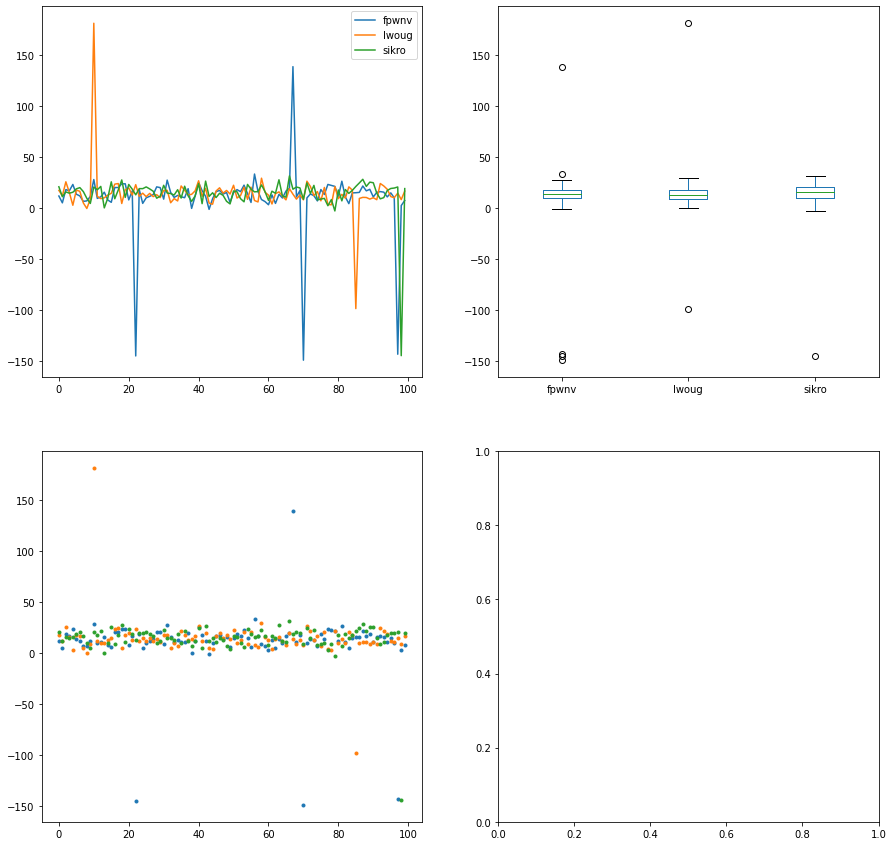

In [7]:
draw_data_set(source_data)

In [8]:
def draw_3D(data):
    x = np.array(data["fpwnv"])
    y = np.array(data["lwoug"])
    z = np.array(data["sikro"])

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(x, y, z)

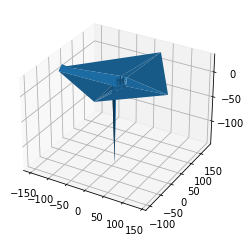

In [9]:
draw_3D(source_data)

### Построить графики для каждой пары признаков в наборе данных.

In [10]:
def draw_pairs(data):
    pairs = combinations(data.keys(), 2)
    for pair in list(pairs):
        draw_pair(data, pair[0], pair[1])
    
    
def draw_pair(data, key1, key2):
    colors = np.zeros((len(data[key1]), 3))
    colors[:] = np.random.rand(3)
    plt.scatter(data[key1], data[key2], s=5, c=colors)
    plt.title(f'График для пары значений {key1} и {key2}')
    plt.xlabel(key1)
    plt.ylabel(key2)
    plt.show()

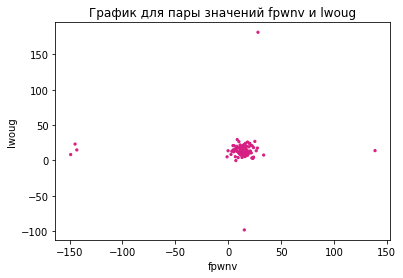

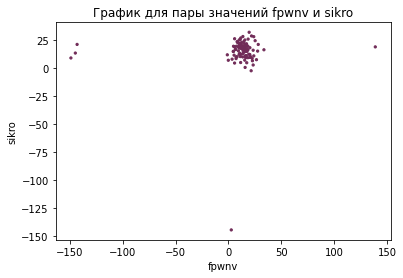

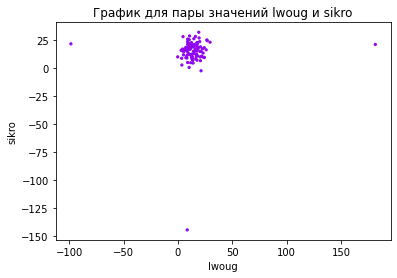

In [11]:
draw_pairs(source_data)

### Построить гистограмму каждого из признаков.

In [12]:
def draw_hists(data):
    for key in data:
        draw_hist(data, key)
    
    
def draw_hist(data, key):
    data[key].hist(color=np.random.rand(3))
    plt.title(f'Гистограмма для признака {key}')
    plt.show()

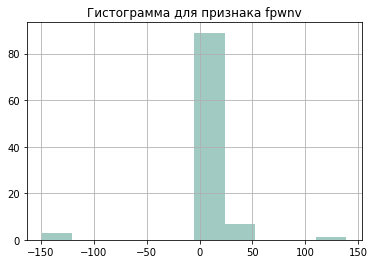

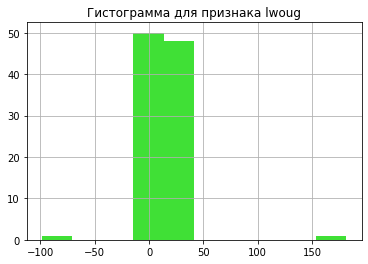

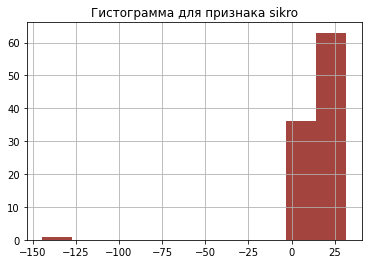

In [13]:
draw_hists(source_data)

### Найти выбросы. Так как вариант нечётный (31), то присвоить выбросам среднее значение.

Я решила рассмотреть первые 4 варианта предложенные [здесь](https://www.machinelearningmastery.ru/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623/)

In [14]:
data_dict = dict()
data_dict["source"] = source_data

**Стандартное отклонение**

In [15]:
clean_data = source_data.copy()

for key in clean_data:
    mean = find_mean(clean_data)[key]
    std = find_std(clean_data)[key]
    limits = (mean - std * 3, mean + std * 3)
    
    clean_data[key] = clean_data[key].map(lambda v: v if limits[0] < v < limits[1] else mean)
    
data_dict["std"] = clean_data

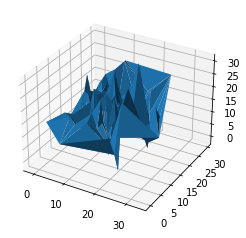

In [16]:
draw_3D(clean_data)

**Квантили**

In [17]:
clean_data = source_data.copy()

for key in clean_data:
    mean = find_mean(clean_data)[key]
    q1 = clean_data[key].quantile(.25) 
    q3 = clean_data[key].quantile(.75) 
    iqr = (q3 - q1) * 1.5

    limits = (q1 - iqr, q3 + iqr)
    
    clean_data[key] = clean_data[key].map(lambda v: v if limits[0] < v < limits[1] else mean)
    
data_dict["quantile"] = clean_data

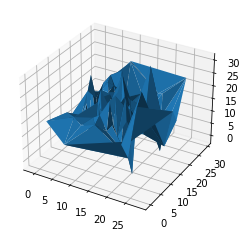

In [18]:
draw_3D(clean_data)

**DBScan**

In [19]:
clean_data = source_data.copy()

outlier_detection = DBSCAN(min_samples = 2, eps = 5)
clusters = outlier_detection.fit_predict(clean_data)
to_remove = clusters == -1

# Я целую строку привожу к среднему, а не только выброс в 1 признаке, но по другому вроде как не получается
for key in clean_data:
    mean = find_mean(clean_data)[key]
    clean_data[to_remove] = mean
    
data_dict["DBScan"] = clean_data

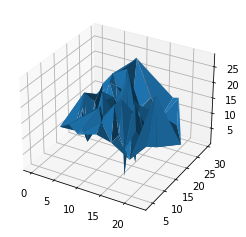

In [20]:
draw_3D(clean_data)

**Изоляция леса**

In [21]:
from sklearn.ensemble import IsolationForest

clean_data = source_data.copy()

clf = IsolationForest( max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(clean_data)
to_remove = preds == -1

# Я целую строку привожу к среднему, а не только выброс в 1 признаке, но по другому вроде как не получается
for key in clean_data:
    mean = find_mean(clean_data)[key]
    clean_data[to_remove] = mean
    
data_dict["IForest"] = clean_data

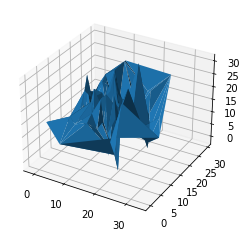

In [22]:
draw_3D(clean_data)

Видно, что стало в разы лучше. Приводить другие графики особого смысла нет, но все датасеты сохранены в data_dict и легко можно отрисовать вызывая функции определённые выше.

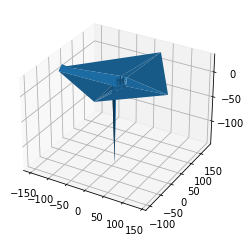

In [23]:
# Для сравнения
draw_3D(source_data)

### Найти новые средние и дисперсии, сравнить со старыми.

Я буду оценивать каждый алгоритм

In [24]:
for name, data in data_dict.items():
    print(f"Оценка для датасета {name}")
    print_cmp_mean_and_var(data, source_data)
    print()

Оценка для датасета source
          Mean                Variance            
fpwnv     10.577(0.0)         958.005(0.0)        
lwoug     14.476(-0.0)        447.331(0.0)        
sikro     14.222(0.0)         300.797(-0.0)       

Оценка для датасета std
          Mean                Variance            
fpwnv     13.981(-3.404)      39.951(918.054)     
lwoug     13.934(0.542)       36.524(410.807)     
sikro     15.81(-1.588)       43.6(257.197)       

Оценка для датасета quantile
          Mean                Variance            
fpwnv     13.75(-3.173)       36.124(921.881)     
lwoug     13.934(0.542)       36.524(410.807)     
sikro     15.81(-1.588)       43.6(257.197)       

Оценка для датасета DBScan
          Mean                Variance            
fpwnv     13.562(-2.985)      18.937(939.068)     
lwoug     14.698(-0.222)      24.429(422.902)     
sikro     15.954(-1.732)      27.781(273.016)     

Оценка для датасета IForest
          Mean                Variance       

Как можно видеть DBScan сильнее всех уменьшил дисперсию и минимально изменил среднюю и это хорошо. Однако на графике видно, что он убрал достаточно много значений, а так как целые строки заменялись на среднее, то вероятно и среднее стало лучше.

Я бы рассматривала в качестве лучшего варианта quantile.

### Нормализовать данные по среднему и дисперсии.

Датасет source
До


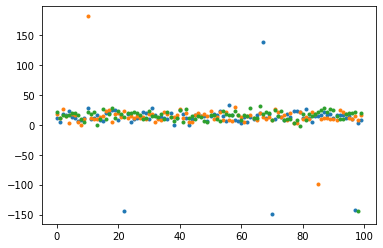

После


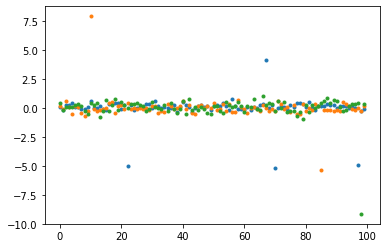

Датасет std
До


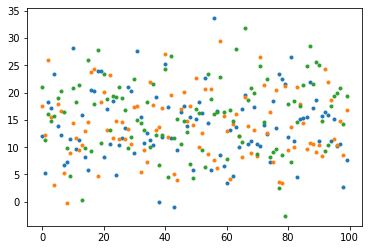

После


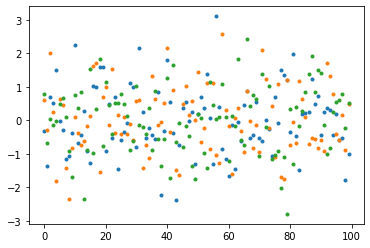

Датасет quantile
До


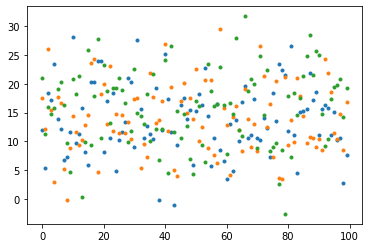

После


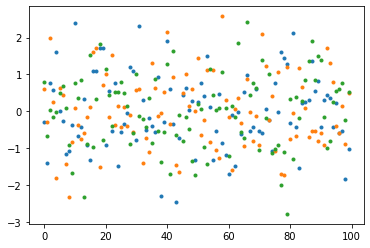

Датасет DBScan
До


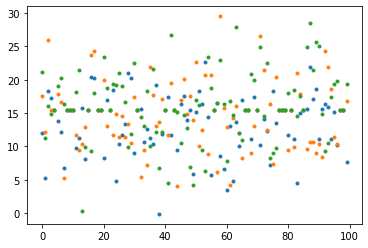

После


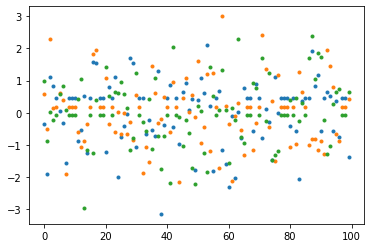

Датасет IForest
До


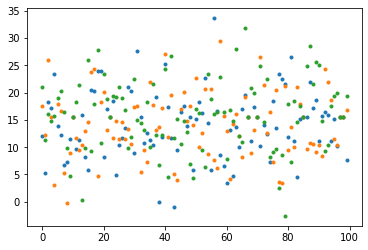

После


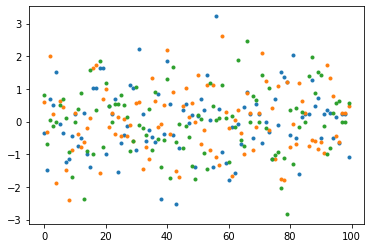

In [25]:
def normalize(data):
    return (data - data.mean()) / data.std()

for name, data in data_dict.items():
    print(f"Датасет {name}")
    
    print("До")
    plt.plot(data, '.')
    plt.show()
    
    print("После")
    plt.plot(normalize(data), '.')    
    plt.show()